In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
sb.set() # set the default Seaborn style for graphics
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
rookiedata = pd.read_csv('rookie_data.csv')
rookiedata.head()

index           Name  Hall of Fame Class  Year Drafted    GP   MIN   PTS  \
0      0    Jeff Taylor                 NaN        1982.0  44.0  17.6   3.6   
1      1  Charles Smith                 NaN        1988.0  71.0  30.4  16.3   
2      2     Mark Davis                 NaN        1988.0  33.0   7.8   3.8   
3      3  Charles Smith                 NaN        1989.0  60.0   8.7   2.9   
4      4  Michael Smith                 NaN        1989.0  65.0   9.5   5.0   

   FGM   FGA   FG%  ...  FTA   FT% OREB  DREB  REB  AST  STL  BLK  TOV   EFF  
0  1.5   3.6  40.0  ...  1.0  65.2  0.6   1.2  1.8  2.5  0.9  0.3  1.4   5.2  
1  6.1  12.4  49.5  ...  5.5  72.5  2.4   4.1  6.5  1.5  1.0  1.3  2.1  16.7  
2  1.5   3.1  48.0  ...  1.0  82.4  0.5   0.6  1.1  0.4  0.4  0.1  0.4   3.8  
3  1.0   2.2  44.4  ...  1.3  69.7  0.2   0.9  1.2  1.7  0.6  0.1  0.6   4.1  
4  2.1   4.4  47.6  ...  1.0  82.8  0.6   0.9  1.5  1.2  0.1  0.0  0.8   4.6  

[5 rows x 24 columns]

In [3]:
rookiedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               2013 non-null   int64  
 1   Name                1537 non-null   object 
 2   Hall of Fame Class  26 non-null     float64
 3   Year Drafted        1537 non-null   float64
 4   GP                  1537 non-null   float64
 5   MIN                 1537 non-null   float64
 6   PTS                 1537 non-null   float64
 7   FGM                 1537 non-null   float64
 8   FGA                 1537 non-null   float64
 9   FG%                 1537 non-null   float64
 10  3P Made             1537 non-null   float64
 11  3PA                 1537 non-null   float64
 12  3P%                 1537 non-null   object 
 13  FTM                 1537 non-null   float64
 14  FTA                 1537 non-null   float64
 15  FT%                 1537 non-null   float64
 16  OREB  

We will first clean the data by removing the empty rows

In [4]:
rookiedata.dropna(subset=['Name'], inplace=True)

In [5]:
# Change the year drafted to type int64
rookiedata['Year Drafted'] = rookiedata['Year Drafted'].astype('int')
rookiedata.loc[rookiedata['3P%'] == '-', '3P%'] = 0
rookiedata['3P%'] = rookiedata['3P%'].astype('float64')

We will change the Hall of Fame class to indicate "1" if the player has made it into the hall of fame, and "0" if the player did not make it into the hall of fame.

In [6]:
# Making Hall of Fame  as True and False.
rookiedata.loc[rookiedata['Hall of Fame Class'].isnull() == False, 'Hall of Fame Class'] = 1
rookiedata.loc[rookiedata['Hall of Fame Class'].isnull() == True, 'Hall of Fame Class'] = 0
rookiedata['Hall of Fame Class'] = rookiedata['Hall of Fame Class'].astype('int')
rookiedata.rename(columns={"Hall of Fame Class": "Hall of Fame"}, inplace=True)

Now we will remove all duplicated names to effectively merge the two datasets using the names as the unique key.

In [7]:
rookiedata.drop_duplicates(subset=["Name"], keep=False, inplace=True, ignore_index=True)
rookiedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1526 non-null   int64  
 1   Name          1526 non-null   object 
 2   Hall of Fame  1526 non-null   int64  
 3   Year Drafted  1526 non-null   int64  
 4   GP            1526 non-null   float64
 5   MIN           1526 non-null   float64
 6   PTS           1526 non-null   float64
 7   FGM           1526 non-null   float64
 8   FGA           1526 non-null   float64
 9   FG%           1526 non-null   float64
 10  3P Made       1526 non-null   float64
 11  3PA           1526 non-null   float64
 12  3P%           1526 non-null   float64
 13  FTM           1526 non-null   float64
 14  FTA           1526 non-null   float64
 15  FT%           1526 non-null   float64
 16  OREB          1526 non-null   float64
 17  DREB          1526 non-null   float64
 18  REB           1526 non-null 

In [8]:
rookiedata

index               Name  Hall of Fame  Year Drafted    GP   MIN   PTS  \
0        11       Andrew Toney             0          1980  75.0  23.6  12.9   
1        12       Bill Hanzlik             0          1980  74.0  17.0   5.4   
2        13      Bill Laimbeer             0          1980  81.0  30.4   9.8   
3        14         Billy Reid             0          1980  59.0  10.1   3.2   
4        15       Butch Carter             0          1980  54.0  12.4   5.6   
...     ...                ...           ...           ...   ...   ...   ...   
1521   1532     Taurean Prince             0          2016  20.0  10.0   3.4   
1522   1533   Tomas Satoransky             0          2016  23.0  14.7   3.1   
1523   1534      Troy Williams             0          2016  24.0  17.4   5.3   
1524   1535    Wade Baldwin IV             0          2016  22.0  13.5   3.5   
1525   1536  Willy Hernangomez             0          2016  28.0  13.6   5.5   

      FGM   FGA   FG%  ...  FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  \
0     5.3  10.7  49.5  ...  3.0  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9   
1     1.9   3.9  47.8  ...  2.0  79.3   0.9   1.2  2.1  1.5  0.8  0.3  1.1   
2     4.2   8.3  50.3  ...  1.9  76.5   3.3   5.3  8.6  2.7  0.7  1.0  1.6   
3     1.4   3.1  45.4  ...  0.7  56.4   0.5   0.6  1.0  1.2  0.6  0.1  1.3   
4     2.1   4.6  46.2  ...  1.8  73.7   0.6   0.6  1.2  1.0  0.4  0.0  0.9   
...   ...   ...   ...  ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   
1521  1.2   3.1  39.3  ...  0.7  85.7   0.2   1.8  2.0  0.7  0.3  0.3  0.7   
1522  1.3   3.2  39.7  ...  0.7  64.7   0.4   1.1  1.5  2.2  0.5  0.0  0.9   
1523  2.1   5.1  41.8  ...  1.0  60.0   0.3   1.6  1.8  0.8  1.0  0.4  1.1   
1524  1.2   3.8  31.3  ...  1.3  82.1   0.3   1.1  1.5  2.1  0.6  0.3  1.3   
1525  2.3   4.1  56.0  ...  1.1  71.9   1.5   3.2  4.7  0.8  0.3  0.5  1.2   

       EFF  
0     10.2  
1      6.4  
2     16.5  
3      2.8  
4      4.3  
...    ...  
1521   4.0  
1522   4.2  
1523   4.8  
1524   3.8  
1525   8.5  

[1526 rows x 24 columns]

## Combining the two datasets

Since only retired players can be elected to be in the NBA hall of fame, we need to add in the year retired for each of the rookies in the dataset.

In [9]:
playerdata = pd.read_csv('player_data.csv')
playerdata.head()

name  year_start  year_end position height  weight  \
0       Alaa Abdelnaby        1991      1995      F-C   6-10   240.0   
1      Zaid Abdul-Aziz        1969      1978      C-F    6-9   235.0   
2  Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   
3   Mahmoud Abdul-Rauf        1991      2001        G    6-1   162.0   
4    Tariq Abdul-Wahad        1998      2003        F    6-6   223.0   

         birth_date                                college  
0     June 24, 1968                        Duke University  
1     April 7, 1946                  Iowa State University  
2    April 16, 1947  University of California, Los Angeles  
3     March 9, 1969             Louisiana State University  
4  November 3, 1974              San Jose State University

In [10]:
# Create a new dataframe with name and year_end
df0 = playerdata[["name", "year_end"]].copy()
# Change the column names
df0.rename(columns={"name": "Name", "year_end": "Retired"}, inplace=True)
# Remove null values
df0.dropna(subset=['Name'], inplace=True)
# Remove duplicates
df0.drop_duplicates(subset=["Name"], keep=False, inplace=True)

Since we are only interested in whether or not the player is retired, we can modify the "Retired" column to indicate True if the player is retired and False if the player is not retired.

In [11]:
df0.loc[df0['Retired'] == 2018, 'Retired'] = 0
df0.loc[df0['Retired'] != 0, 'Retired'] = 1
df0['Retired'] = df0['Retired'].astype('int')

In [12]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4453 entries, 0 to 4549
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     4453 non-null   object
 1   Retired  4453 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 104.4+ KB


In [13]:
rookiedata = rookiedata.merge(df0, left_on=["Name"], right_on=["Name"])
rookiedata

index               Name  Hall of Fame  Year Drafted    GP   MIN   PTS  \
0        11       Andrew Toney             0          1980  75.0  23.6  12.9   
1        12       Bill Hanzlik             0          1980  74.0  17.0   5.4   
2        13      Bill Laimbeer             0          1980  81.0  30.4   9.8   
3        14         Billy Reid             0          1980  59.0  10.1   3.2   
4        15       Butch Carter             0          1980  54.0  12.4   5.6   
...     ...                ...           ...           ...   ...   ...   ...   
1457   1529    Rodney McGruder             0          2016  30.0  25.7   5.8   
1458   1530     Semaj Christon             0          2016  33.0  15.6   3.0   
1459   1533   Tomas Satoransky             0          2016  23.0  14.7   3.1   
1460   1534      Troy Williams             0          2016  24.0  17.4   5.3   
1461   1536  Willy Hernangomez             0          2016  28.0  13.6   5.5   

      FGM   FGA   FG%  ...   FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  \
0     5.3  10.7  49.5  ...  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2   
1     1.9   3.9  47.8  ...  79.3   0.9   1.2  2.1  1.5  0.8  0.3  1.1   6.4   
2     4.2   8.3  50.3  ...  76.5   3.3   5.3  8.6  2.7  0.7  1.0  1.6  16.5   
3     1.4   3.1  45.4  ...  56.4   0.5   0.6  1.0  1.2  0.6  0.1  1.3   2.8   
4     2.1   4.6  46.2  ...  73.7   0.6   0.6  1.2  1.0  0.4  0.0  0.9   4.3   
...   ...   ...   ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   ...   
1457  2.1   5.3  40.0  ...  72.4   1.5   2.0  3.5  1.5  0.7  0.3  0.7   7.5   
1458  1.3   4.0  31.8  ...  52.9   0.4   1.0  1.4  2.5  0.4  0.1  0.7   3.7   
1459  1.3   3.2  39.7  ...  64.7   0.4   1.1  1.5  2.2  0.5  0.0  0.9   4.2   
1460  2.1   5.1  41.8  ...  60.0   0.3   1.6  1.8  0.8  1.0  0.4  1.1   4.8   
1461  2.3   4.1  56.0  ...  71.9   1.5   3.2  4.7  0.8  0.3  0.5  1.2   8.5   

      Retired  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
1457        1  
1458        1  
1459        0  
1460        0  
1461        0  

[1462 rows x 25 columns]

## Let's do some data visualization to know our data better

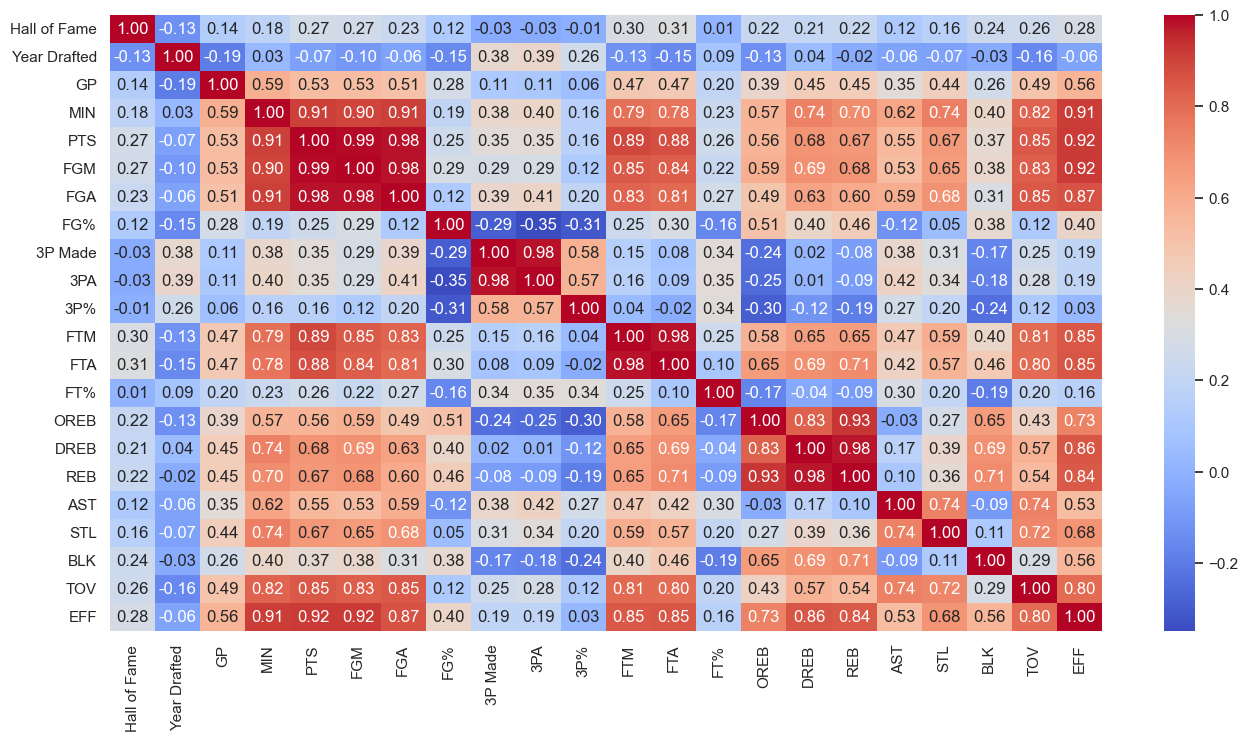

In [14]:
# Select variables of interest
nba_vars = rookiedata.loc[:, 'Name':'EFF']

# Compute the correlation matrix
corr = nba_vars.corr()

# Create a heatmap with the correlation matrix
fig, ax = plt.subplots(figsize=(16, 8))
sb.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', ax=ax)

# Show the plot
plt.show()

In [15]:
# Select variables of interest
nba_vars = rookiedata.loc[:, 'Name':'EFF']

# Compute the correlation matrix
corr = nba_vars.corr()

# Get the top 5 highest correlations with the 'HOF' variable
top_corr = corr['Hall of Fame'].sort_values(ascending=False)[1:6]

# Print the results
print(top_corr)

FTA    0.314928
FTM    0.301131
EFF    0.284246
PTS    0.271857
FGM    0.265879
Name: Hall of Fame, dtype: float64


In [16]:
!pip install plotly

In [17]:
# Filter the data to select only hall of fame players
hof_players = rookiedata[rookiedata['Hall of Fame'] == 1]

# Print the list of hall of fame players
hof_players

index               Name  Hall of Fame  Year Drafted    GP   MIN   PTS  \
21      34       Kevin McHale             1          1980  82.0  20.1  10.0   
58      74       Isiah Thomas             1          1981  72.0  33.8  17.0   
92     111  Dominique Wilkins             1          1982  82.0  32.9  17.5   
95     115       James Worthy             1          1982  77.0  25.6  13.4   
124    147      Clyde Drexler             1          1983  82.0  17.2   7.7   
145    168      Ralph Sampson             1          1983  82.0  32.8  21.0   
162    185    Charles Barkley             1          1984  82.0  28.6  14.0   
169    194    Hakeem Olajuwon             1          1984  82.0  35.5  20.6   
174    199      John Stockton             1          1984  82.0  18.2   5.6   
181    208     Michael Jordan             1          1984  82.0  38.3  28.2   
210    237       Chris Mullin             1          1985  55.0  25.3  14.0   
219    246         Joe Dumars             1          1985  82.0  23.9   9.4   
223    250        Karl Malone             1          1985  81.0  30.6  14.9   
250    280      Dennis Rodman             1          1986  77.0  15.0   6.5   
301    333      Reggie Miller             1          1987  82.0  22.4  10.0   
303    336     Scottie Pippen             1          1987  79.0  20.9   7.9   
337    370     Mitch Richmond             1          1988  79.0  34.4  22.0   
362    396     David Robinson             1          1989  82.0  36.6  24.3   
456    493    Dikembe Mutombo             1          1991  71.0  38.3  16.6   
491    530    Alonzo Mourning             1          1992  78.0  33.9  21.0   
525    566   Shaquille O'Neal             1          1992  81.0  37.9  23.4   
616    658    Arvydas Sabonis             1          1995  73.0  23.8  14.5   
652    694      Allen Iverson             1          1996  76.0  40.1  23.5   
901    949           Yao Ming             1          2002  82.0  29.0  13.5   

      FGM   FGA   FG%  ...   FT%  OREB  DREB   REB  AST  STL  BLK  TOV   EFF  \
21    4.3   8.1  53.3  ...  67.9   1.9   2.5   4.4  0.7  0.3  1.8  1.3  11.4   
58    6.3  14.8  42.4  ...  70.4   0.8   2.1   2.9  7.8  2.1  0.2  4.2  15.6   
92    7.3  14.9  49.3  ...  68.2   2.8   3.1   5.8  1.6  1.0  0.8  2.2  15.6   
95    5.8  10.0  57.9  ...  62.4   2.0   3.1   5.2  1.7  1.2  0.8  2.3  14.7   
124   3.1   6.8  45.1  ...  72.8   1.4   1.5   2.9  1.9  1.3  0.3  1.5   8.2   
145   8.7  16.7  52.3  ...  66.1   3.6   7.6  11.1  2.0  0.8  2.4  3.6  24.0   
162   5.2   9.5  54.5  ...  73.3   3.2   5.3   8.6  1.9  1.2  1.0  2.5  18.4   
169   8.3  15.3  53.8  ...  61.3   5.4   6.5  11.9  1.4  1.2  2.7  2.9  25.2   
174   1.9   4.1  47.1  ...  73.6   0.3   1.0   1.3  5.1  1.3  0.1  1.8   8.8   
181  10.2  19.8  51.5  ...  84.5   2.0   4.5   6.5  5.9  2.4  0.8  3.5  29.2   
210   5.2  11.3  46.3  ...  89.6   0.8   1.3   2.1  1.9  1.3  0.4  1.4  11.8   
219   3.5   7.3  48.1  ...  79.8   0.7   0.7   1.5  4.8  0.8  0.1  1.9  10.2   
223   6.2  12.5  49.6  ...  48.1   2.1   6.7   8.9  2.9  1.3  0.5  3.4  16.1   
250   2.8   5.1  54.5  ...  58.7   2.1   2.2   4.3  0.7  0.5  0.6  1.2   8.5   
301   3.7   7.6  48.8  ...  80.1   1.2   1.2   2.3  1.6  0.7  0.2  1.2   9.2   
303   3.3   7.1  46.3  ...  57.6   1.5   2.3   3.8  2.1  1.1  0.7  1.7   9.2   
337   8.2  17.5  46.8  ...  81.0   2.0   3.9   5.9  4.2  1.0  0.2  3.4  19.4   
362   8.4  15.9  53.1  ...  73.2   3.7   8.3  12.0  2.0  1.7  3.9  3.1  30.6   
456   6.0  12.2  49.3  ...  64.2   4.5   7.8  12.3  2.2  0.6  3.0  3.5  22.3   
491   7.3  14.3  51.1  ...  78.1   3.4   6.9  10.3  1.0  0.3  3.5  3.0  24.3   
525   9.0  16.1  56.2  ...  59.2   4.2   9.6  13.9  1.9  0.7  3.5  3.8  28.9   
616   5.4   9.9  54.5  ...  75.7   2.0   6.0   8.1  1.8  0.9  1.1  2.1  18.6   
652   8.2  19.8  41.6  ...  70.2   1.5   2.6   4.1  7.5  2.1  0.3  4.4  19.3   
901   4.9   9.8  49.8  ...  81.1   2.4   5.8   8.2  1.7  0.4  1.8  2.1  17.6   

     Retired  
21         1 

## As we can see, a total of 23 players from1461 players got into Hall of Fame. Let's do some data visualization based on these 23 outstanding players.

In [18]:
import random

# function to generate random colors
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

# sort the DataFrame by PTS in descending order and select top 25 rows
sorted_players = hof_players.sort_values('PTS', ascending=False).head(25)

# calculate the average PTS for players not in HoF
avg_pts = rookiedata[~rookiedata['Name'].isin(hof_players['Name'])]['PTS'].mean()

# create trace for HoF players
trace0 = go.Bar(
    x=sorted_players['Name'].head(25),
    y=sorted_players['PTS'].head(25),
    marker=dict(
        color= random_colors(25),
    ),
    opacity=0.6,
    name='HoF Players'
)

# create trace for other players
trace1 = go.Bar(
    x=['Other non-HoF Players'],
    y=[avg_pts],
    marker=dict(
        color= 'grey',
    ),
    opacity=0.6,
    name='Other non-HoF Players'
)

# combine the traces into a data list
data = [trace0, trace1]

# create the layout
layout = go.Layout(
    title={
        'text': 'HoF players with their points per game',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# create the figure and display it
fig = go.Figure(data=data, layout=layout)
fig.show()

In [19]:
# sort the DataFrame by PTS in descending order and select top 25 rows
sorted_players = hof_players.sort_values('AST', ascending=False).head(25)

# calculate the average PTS for players not in HoF
avg_pts = rookiedata[~rookiedata['Name'].isin(hof_players['Name'])]['AST'].mean()

# create trace for HoF players
trace0 = go.Bar(
    x=sorted_players['Name'].head(25),
    y=sorted_players['AST'].head(25),
    marker=dict(
        color= random_colors(25),
    ),
    opacity=0.6,
    name='HoF Players'
)

# create trace for other players
trace1 = go.Bar(
    x=['Other non-HoF Players'],
    y=[avg_pts],
    marker=dict(
        color= 'grey',
    ),
    opacity=0.6,
    name='Other non-HoF Players'
)

# combine the traces into a data list
data = [trace0, trace1]

# create the layout
layout = go.Layout(
    title={
        'text': 'HoF players with their assists per game',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# create the figure and display it
fig = go.Figure(data=data, layout=layout)
fig.show()

In [20]:
# sort the DataFrame by PTS in descending order and select top 25 rows
sorted_players = hof_players.sort_values('FG%', ascending=False).head(25)

# calculate the average PTS for players not in HoF
avg_pts = rookiedata[~rookiedata['Name'].isin(hof_players['Name'])]['FG%'].mean()

# create trace for HoF players
trace0 = go.Bar(
    x=sorted_players['Name'].head(25),
    y=sorted_players['FG%'].head(25),
    marker=dict(
        color= random_colors(25),
    ),
    opacity=0.6,
    name='HoF Players'
)

# create trace for other players
trace1 = go.Bar(
    x=['Other non-HoF Players'],
    y=[avg_pts],
    marker=dict(
        color= 'grey',
    ),
    opacity=0.6,
    name='Other non-HoF Players'
)

# combine the traces into a data list
data = [trace0, trace1]

# create the layout
layout = go.Layout(
    title={
        'text': 'HoF players with their points per game',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# create the figure and display it
fig = go.Figure(data=data, layout=layout)
fig.show()

### As we can see, generally, HoF players have higher PTS, FG%, Assits per game, than the non-HoF players.

In [21]:
# create subplots with 2 rows and 2 columns
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=['EFF vs PTS', 'MIN vs PTS', 'GP vs PTS', 'FG% vs PTS'], 
                    specs=[[{'rowspan': 1, 'colspan': 1}, {'rowspan': 1, 'colspan': 1}], 
                           [{'rowspan': 1, 'colspan': 1}, {'rowspan': 1, 'colspan': 1}]], 
                    horizontal_spacing=0.2, vertical_spacing=0.2)

# define colors for each player
colors = px.colors.qualitative.Alphabet[:len(hof_players)]

# loop through the players and add each scatter plot to a subplot
for i, player in enumerate(hof_players['Name']):
    fig.add_trace(
        go.Scatter(x=hof_players[hof_players['Name']==player]['PTS'],
                   y=hof_players[hof_players['Name']==player]['EFF'],
                   mode='markers',
                   name=player,
                   marker=dict(color=colors[i])
        ),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(x=hof_players[hof_players['Name']==player]['PTS'],
                   y=hof_players[hof_players['Name']==player]['MIN'],
                   mode='markers',
                   name=player,
                   marker=dict(color=colors[i])
        ),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter(x=hof_players[hof_players['Name']==player]['PTS'],
                   y=hof_players[hof_players['Name']==player]['GP'],
                   mode='markers',
                   name=player,
                   marker=dict(color=colors[i])
        ),
        row=2, col=1
    )
    fig.add_trace(
        go.Scatter(x=hof_players[hof_players['Name']==player]['PTS'],
                   y=hof_players[hof_players['Name']==player]['FG%'],
                   mode='markers',
                   name=player,
                   marker=dict(color=colors[i])
        ),
        row=2, col=2
    )

# update subplot layout and axis titles
fig.update_layout(title='Data Visualization on HoF players')
fig.update_xaxes(title_text='PTS')
fig.update_yaxes(title_text='EFF', row=1, col=1)
fig.update_yaxes(title_text='MIN', row=1, col=2)
fig.update_yaxes(title_text='GP', row=2, col=1)
fig.update_yaxes(title_text='FG%', row=2, col=2)

# show the plot
fig.show()

### As we can see, magenta colour dot : Michael Jordan is always on the top right, indicating he is one of the top performing players among the Hall of Fame. The left bottom green colour dot, deem as one of the lowest performing players, John Stockton, can be viewed as the margin line to enter the Hall of Fame. Other rookie players are expected to perform better than the margin line in order to enter Hall of Fame

## Splitting the data

We will now split the data into two: retired and non-retired players, because only retired players can make it into the hall of fame. We will subsequently use the model to determine if these non-retired players will make it into the hall of fame based on their rookie statistics.

In [22]:
rookiedata_retired = rookiedata.drop(rookiedata[rookiedata['Retired'] == 0].index)
rookiedata_active = rookiedata.drop(rookiedata[rookiedata['Retired'] == 1].index)

In [23]:
rookiedata_retired.reset_index(drop=True, inplace=True)
rookiedata_retired.drop(columns="Name", inplace=True)
rookiedata_retired

index  Hall of Fame  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  \
0        11             0          1980  75.0  23.6  12.9  5.3  10.7  49.5   
1        12             0          1980  74.0  17.0   5.4  1.9   3.9  47.8   
2        13             0          1980  81.0  30.4   9.8  4.2   8.3  50.3   
3        14             0          1980  59.0  10.1   3.2  1.4   3.1  45.4   
4        15             0          1980  54.0  12.4   5.6  2.1   4.6  46.2   
...     ...           ...           ...   ...   ...   ...  ...   ...   ...   
1186   1468             0          2015  57.0  12.2   5.0  2.0   4.9  41.0   
1187   1486             0          2015  35.0  11.3   2.4  0.8   2.3  35.0   
1188   1488             0          2015  53.0  16.4   4.5  1.8   4.3  42.2   
1189   1529             0          2016  30.0  25.7   5.8  2.1   5.3  40.0   
1190   1530             0          2016  33.0  15.6   3.0  1.3   4.0  31.8   

      3P Made  ...   FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  Retired  
0         0.1  ...  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2        1  
1         0.0  ...  79.3   0.9   1.2  2.1  1.5  0.8  0.3  1.1   6.4        1  
2         0.0  ...  76.5   3.3   5.3  8.6  2.7  0.7  1.0  1.6  16.5        1  
3         0.0  ...  56.4   0.5   0.6  1.0  1.2  0.6  0.1  1.3   2.8        1  
4         0.1  ...  73.7   0.6   0.6  1.2  1.0  0.4  0.0  0.9   4.3        1  
...       ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   ...      ...  
1186      0.6  ...  79.2   0.2   1.3  1.5  1.9  0.6  0.1  0.8   5.4        1  
1187      0.3  ...  72.7   0.1   1.3  1.4  1.1  0.3  0.1  0.7   2.9        1  
1188      0.3  ...  93.1   0.3   1.4  1.7  3.4  0.5  0.1  1.5   6.2        1  
1189      0.8  ...  72.4   1.5   2.0  3.5  1.5  0.7  0.3  0.7   7.5        1  
1190      0.2  ...  52.9   0.4   1.0  1.4  2.5  0.4  0.1  0.7   3.7        1  

[1191 rows x 24 columns]

In [24]:
rookiedata_active.reset_index(drop=True, inplace=True)
rookiedata_active

index               Name  Hall of Fame  Year Drafted    GP   MIN   PTS  \
0      775      Dirk Nowitzki             0          1998  47.0  20.4   8.2   
1      801       Vince Carter             0          1998  50.0  35.2  18.3   
2      816        Jason Terry             0          1999  81.0  23.3   8.1   
3      851     Jamal Crawford             0          2000  61.0  17.2   4.6   
4      885        Joe Johnson             0          2001  77.0  24.9   7.5   
..     ...                ...           ...           ...   ...   ...   ...   
266   1527      Pascal Siakam             0          2016  32.0  17.8   5.1   
267   1528      Patrick McCaw             0          2016  26.0  12.2   2.8   
268   1533   Tomas Satoransky             0          2016  23.0  14.7   3.1   
269   1534      Troy Williams             0          2016  24.0  17.4   5.3   
270   1536  Willy Hernangomez             0          2016  28.0  13.6   5.5   

     FGM   FGA   FG%  ...   FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  \
0    2.9   7.1  40.5  ...  77.3   0.9   2.6  3.4  1.0  0.6  0.6  1.6   7.4   
1    6.9  15.3  45.0  ...  76.1   1.9   3.8  5.7  3.0  1.1  1.5  2.2  17.6   
2    3.1   7.4  41.5  ...  80.7   0.3   1.8  2.0  4.3  1.1  0.1  1.9   9.1   
3    1.8   5.0  35.2  ...  79.4   0.1   1.3  1.5  2.3  0.7  0.2  1.4   4.6   
4    3.3   7.6  43.0  ...  77.4   1.0   2.4  3.3  2.3  0.8  0.3  0.9   8.8   
..   ...   ...   ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   ...   
266  2.3   4.3  52.5  ...  77.3   1.3   2.2  3.5  0.4  0.5  0.8  0.7   7.4   
267  1.1   2.8  38.9  ...  50.0   0.3   0.8  1.0  1.0  0.4  0.3  0.6   3.2   
268  1.3   3.2  39.7  ...  64.7   0.4   1.1  1.5  2.2  0.5  0.0  0.9   4.2   
269  2.1   5.1  41.8  ...  60.0   0.3   1.6  1.8  0.8  1.0  0.4  1.1   4.8   
270  2.3   4.1  56.0  ...  71.9   1.5   3.2  4.7  0.8  0.3  0.5  1.2   8.5   

     Retired  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
266        0  
267        0  
268        0  
269        0  
270        0  

[271 rows x 25 columns]

## Resolving the Imbalance

In [25]:
print(rookiedata_retired.groupby('Hall of Fame').size())

Hall of Fame
0    1167
1      24
dtype: int64


We realise that the data is heavily skewed and highly imbalanced.

Majority (1167 count) is not in the hall of fame while only 24 count belongs in the hall of fame.

We are going to look at 3 techniques to resolve this imbalance:

Method 1: Undersampling
Method 2: Oversampling
Method 3: SMOTE

## Undersampling
### Reducing the data by eliminating examples belonging to the majority class with the objective of equalizing the number of examples of each class

In [26]:
#split into X and y
dfy = rookiedata_retired[['Hall of Fame']]
dfX = rookiedata_retired.drop('Hall of Fame', axis=1)

<Figure size 1600x800 with 0 Axes>

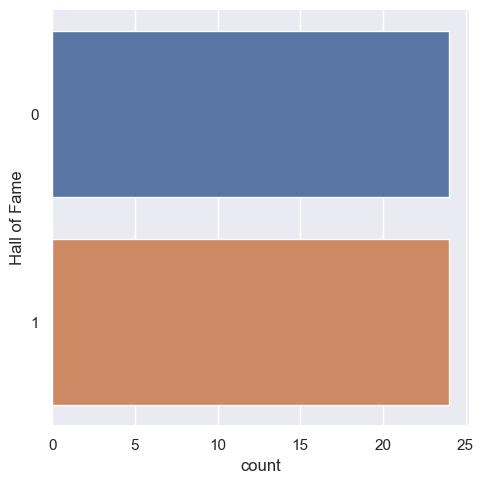

In [27]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_US, y_US = undersample.fit_resample(dfX, dfy)

f = plt.figure(figsize=(16, 8))
sb.catplot(y = "Hall of Fame", data = y_US, kind = "count")

In [28]:
# New dataset will be balanced with same number of Hall of Fame=True and Hall of Fame=False
data_US = pd.concat([X_US, y_US], axis=1)
data_US.head()

index  Year Drafted    GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA  ...  \
0    974          2003  38.0  19.1  4.5  1.7  3.6  45.7      0.1  0.3  ...   
1    124          1982  80.0  20.2  5.1  2.0  4.4  46.2      0.0  0.0  ...   
2    927          2002  76.0  11.5  3.0  1.3  3.2  39.3      0.3  0.9  ...   
3    316          1987  82.0  20.8  8.5  3.1  6.3  49.1      0.1  0.4  ...   
4   1429          2014  68.0  15.4  4.8  1.8  3.9  45.2      1.0  2.5  ...   

   OREB  DREB  REB  AST  STL  BLK  TOV   EFF  Retired  Hall of Fame  
0   1.4   2.6  4.0  1.3  0.7  0.1  1.2   6.9        1             0  
1   1.5   2.7  4.1  1.0  0.4  0.6  1.7   6.7        1             0  
2   0.3   0.9  1.2  0.9  0.1  0.1  0.8   2.5        1             0  
3   1.4   2.6  4.0  1.3  0.8  0.8  1.3  10.2        1             0  
4   0.1   0.6  0.7  0.8  0.2  0.1  0.7   3.6        1             0  

[5 rows x 24 columns]

In [29]:
#check count
print(data_US.groupby('Hall of Fame').size())

Hall of Fame
0    24
1    24
dtype: int64


Disadvantage: The deletion of observations in this random manner may lead to the deletion of some very useful information from the dataset

## Oversampling
### Random over-sampling is a technique that randomly samples a number of observations from the minority class (sampling is done with replacement) and adds them to the dataset.

<Figure size 1600x800 with 0 Axes>

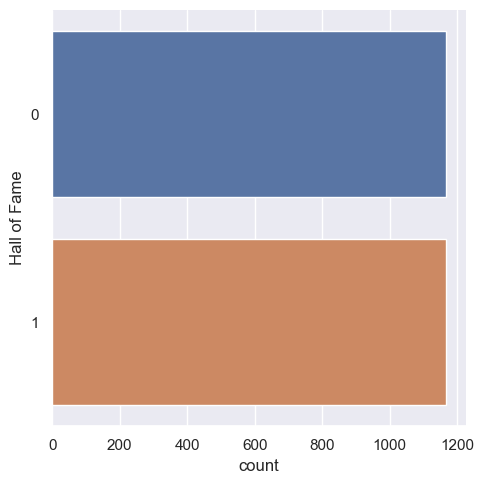

In [30]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_OS, y_OS = oversample.fit_resample(dfX, dfy)

f = plt.figure(figsize=(16, 8))
sb.catplot(y = "Hall of Fame", data = y_OS, kind = "count")

In [31]:
#new dataset will be balanced with same number of isfraud=1 and isfraud=0
data_OS = pd.concat([X_OS, y_OS], axis=1)
data_OS.head()

index  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  ...  \
0     11          1980  75.0  23.6  12.9  5.3  10.7  49.5      0.1  0.4  ...   
1     12          1980  74.0  17.0   5.4  1.9   3.9  47.8      0.0  0.1  ...   
2     13          1980  81.0  30.4   9.8  4.2   8.3  50.3      0.0  0.0  ...   
3     14          1980  59.0  10.1   3.2  1.4   3.1  45.4      0.0  0.1  ...   
4     15          1980  54.0  12.4   5.6  2.1   4.6  46.2      0.1  0.2  ...   

   OREB  DREB  REB  AST  STL  BLK  TOV   EFF  Retired  Hall of Fame  
0   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2        1             0  
1   0.9   1.2  2.1  1.5  0.8  0.3  1.1   6.4        1             0  
2   3.3   5.3  8.6  2.7  0.7  1.0  1.6  16.5        1             0  
3   0.5   0.6  1.0  1.2  0.6  0.1  1.3   2.8        1             0  
4   0.6   0.6  1.2  1.0  0.4  0.0  0.9   4.3        1             0  

[5 rows x 24 columns]

In [32]:
#check count
print(data_OS.groupby('Hall of Fame').size())

Hall of Fame
0    1167
1    1167
dtype: int64


Disadvantage: This technique may increase the chance of model overfitting.

## SMOTE
### SMOTE is a technique that generates new observations by interpolating between observations in the original dataset. Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels.

<Figure size 1600x800 with 0 Axes>

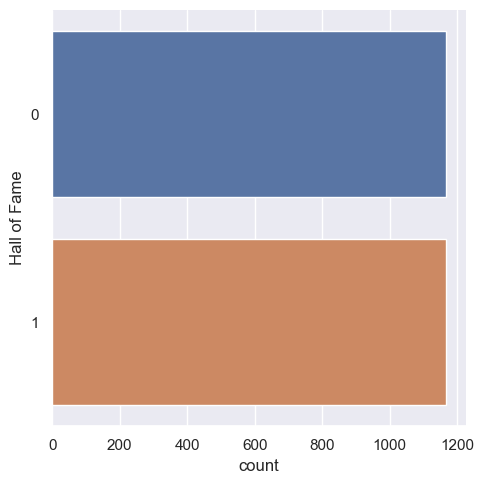

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_SM, y_SM = smote.fit_resample(dfX, dfy)

f = plt.figure(figsize=(16, 8))
sb.catplot(y = "Hall of Fame", data = y_SM, kind = "count")

In [34]:
#new dataset will be balanced with same number of Hall of Fame = True and Hall of Fame = False
data_SM = pd.concat([X_SM, y_SM], axis=1)
data_SM.head()

index  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  ...  \
0     11          1980  75.0  23.6  12.9  5.3  10.7  49.5      0.1  0.4  ...   
1     12          1980  74.0  17.0   5.4  1.9   3.9  47.8      0.0  0.1  ...   
2     13          1980  81.0  30.4   9.8  4.2   8.3  50.3      0.0  0.0  ...   
3     14          1980  59.0  10.1   3.2  1.4   3.1  45.4      0.0  0.1  ...   
4     15          1980  54.0  12.4   5.6  2.1   4.6  46.2      0.1  0.2  ...   

   OREB  DREB  REB  AST  STL  BLK  TOV   EFF  Retired  Hall of Fame  
0   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2        1             0  
1   0.9   1.2  2.1  1.5  0.8  0.3  1.1   6.4        1             0  
2   3.3   5.3  8.6  2.7  0.7  1.0  1.6  16.5        1             0  
3   0.5   0.6  1.0  1.2  0.6  0.1  1.3   2.8        1             0  
4   0.6   0.6  1.2  1.0  0.4  0.0  0.9   4.3        1             0  

[5 rows x 24 columns]

In [35]:
#check count
print(data_SM.groupby('Hall of Fame').size())

Hall of Fame
0    1167
1    1167
dtype: int64


### We will decide which method to adopt by looking at the correlation between Hall of Fame and EFF after each method through a scatterplot graph.

index  Year Drafted        GP       MIN       PTS       FGM  \
index         1.000000      0.999212 -0.287473 -0.262223 -0.280844 -0.325200   
Year Drafted  0.999212      1.000000 -0.290598 -0.269907 -0.287491 -0.331262   
GP           -0.287473     -0.290598  1.000000  0.580272  0.508526  0.538449   
MIN          -0.262223     -0.269907  0.580272  1.000000  0.921208  0.914559   
PTS          -0.280844     -0.287491  0.508526  0.921208  1.000000  0.990585   
FGM          -0.325200     -0.331262  0.538449  0.914559  0.990585  1.000000   
FGA          -0.278702     -0.285786  0.506481  0.932055  0.980302  0.978789   
FG%          -0.416628     -0.415214  0.501479  0.405655  0.465153  0.514930   
3P Made       0.370993      0.364878 -0.029844  0.214580  0.168060  0.109506   
3PA           0.334763      0.328125  0.002433  0.255074  0.205663  0.148688   
3P%           0.281494      0.279435  0.028725  0.014625 -0.041802 -0.069219   
FTM          -0.216380     -0.222621  0.402003  0.842929  0.937616  0.889691   
FTA          -0.244929     -0.252324  0.427439  0.869974  0.950158  0.915705   
FT%           0.209547      0.211852 -0.141851 -0.053023  0.001843 -0.067037   
OREB         -0.292075     -0.293766  0.453496  0.669142  0.692851  0.724718   
DREB         -0.151453     -0.157652  0.437927  0.705546  0.742802  0.756113   
REB          -0.204268     -0.209042  0.450247  0.707795  0.742195  0.762020   
AST          -0.190874     -0.194051  0.314402  0.601675  0.455702  0.429926   
STL          -0.338746     -0.336891  0.394972  0.710966  0.644788  0.628721   
BLK          -0.139822     -0.140637  0.339054  0.498220  0.591438  0.591394   
TOV          -0.306573     -0.313926  0.484557  0.915574  0.901023  0.892967   
EFF          -0.292914     -0.297248  0.547167  0.896073  0.940868  0.938429   
Retired            NaN           NaN       NaN       NaN       NaN       NaN   
Hall of Fame -0.414643     -0.413784  0.544710  0.563330  0.644038  0.660199   

                   FGA       FG%   3P Made       3PA  ...      OREB      DREB  \
index        -0.278702 -0.416628  0.370993  0.334763  ... -0.292075 -0.151453   
Year Drafted -0.285786 -0.415214  0.364878  0.328125  ... -0.293766 -0.157652   
GP            0.506481  0.501479 -0.029844  0.002433  ...  0.453496  0.437927   
MIN           0.932055  0.405655  0.214580  0.255074  ...  0.669142  0.705546   
PTS           0.980302  0.465153  0.168060  0.205663  ...  0.692851  0.742802   
FGM           0.978789  0.514930  0.109506  0.148688  ...  0.724718  0.756113   
FGA           1.000000  0.364891  0.245050  0.292553  ...  0.622347  0.663544   
FG%           0.364891  1.000000 -0.365576 -0.365687  ...  0.674652  0.620139   
3P Made       0.245050 -0.365576  1.000000  0.989755  ... -0.271616 -0.208325   
3PA           0.292553 -0.365687  0.989755  1.000000  ... -0.266477 -0.203975   
3P%           0.015115 -0.366361  0.541872  0.520387  ... -0.428773 -0.318927   
FTM           0.880214  0.381719  0.102654  0.136479  ...  0.629256  0.711981   
FTA           0.896463  0.433077  0.081312  0.112039  ...  0.715319  0.792115   
FT%          -0.011469 -0.334316  0.175419  0.190109  ... -0.353425 -0.284338   
OREB          0.622347  0.674652 -0.271616 -0.266477  ...  1.000000  0.898740   
DREB          0.663544  0.620139 -0.208325 -0.203975  ...  0.898740  1.000000   
REB           0.663361  0.654678 -0.235625 -0.231428  ...  0.954194  0.988559   
AST           0.531787 -0.100146  0.358158  0.411304  ... -0.031588  0.057347   
STL           0.681117  0.150203  0.237629  0.293431  ...  0.222908  0.268842   
BLK           0.479069  0.593747 -0.297608 -0.306366  ...  0.849731  0.856636   
TOV           0.913691  0.343510  0.196173  0.237181  ...  0.614464  0.701005   
EFF           0.882819  0.598983 -0.033624 -0.006698  ...  0.820549  0.874603   
Retired            NaN       NaN       NaN       NaN  ...       NaN       NaN   
Hall of Fame  0.594748  0.578607 -0.109710 -0.107132  ...  0.566146  0.5

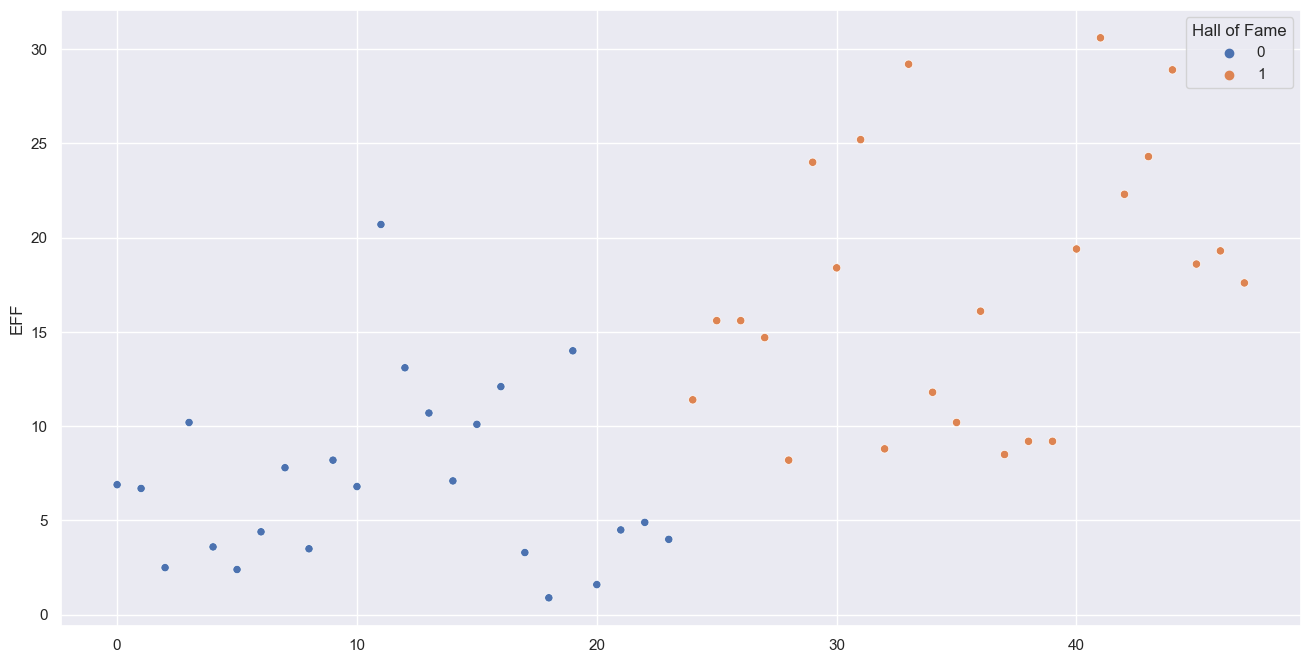

In [36]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=data_US, x=data_US.index, y='EFF', hue='Hall of Fame')
data_US.corr()

Correlation between **EFF** and **Hall of Fame** = **0.685915**

index  Year Drafted        GP       MIN       PTS       FGM  \
index         1.000000      0.999228 -0.413305 -0.246796 -0.296770 -0.335139   
Year Drafted  0.999228      1.000000 -0.412667 -0.248509 -0.298922 -0.337580   
GP           -0.413305     -0.412667  1.000000  0.634136  0.575756  0.592497   
MIN          -0.246796     -0.248509  0.634136  1.000000  0.935737  0.929967   
PTS          -0.296770     -0.298922  0.575756  0.935737  1.000000  0.991427   
FGM          -0.335139     -0.337580  0.592497  0.929967  0.991427  1.000000   
FGA          -0.297980     -0.300019  0.561691  0.939228  0.980834  0.981482   
FG%          -0.344349     -0.344796  0.488946  0.391024  0.442732  0.479119   
3P Made       0.333721      0.333599  0.001451  0.196218  0.150865  0.106655   
3PA           0.327300      0.327232 -0.010857  0.202086  0.157735  0.112607   
3P%           0.220980      0.220402  0.020958  0.011781 -0.017467 -0.035133   
FTM          -0.242001     -0.243129  0.496544  0.857203  0.935972  0.890009   
FTA          -0.258815     -0.261281  0.513664  0.881015  0.943627  0.909592   
FT%           0.052797      0.055828  0.094480  0.123584  0.148837  0.097946   
OREB         -0.244222     -0.245668  0.495767  0.699357  0.701736  0.723647   
DREB         -0.119979     -0.124434  0.474955  0.739162  0.745956  0.751987   
REB          -0.166563     -0.170093  0.494399  0.743512  0.748722  0.760408   
AST          -0.225653     -0.226098  0.349094  0.549507  0.480677  0.449341   
STL          -0.346810     -0.342724  0.440419  0.655080  0.640223  0.621800   
BLK          -0.123173     -0.126124  0.371720  0.569583  0.606440  0.600545   
TOV          -0.326391     -0.329392  0.565558  0.903301  0.894973  0.887651   
EFF          -0.279401     -0.281697  0.602949  0.911468  0.952203  0.944081   
Retired            NaN           NaN       NaN       NaN       NaN       NaN   
Hall of Fame -0.480929     -0.478139  0.591115  0.632337  0.677355  0.682676   

                   FGA       FG%   3P Made       3PA  ...      OREB      DREB  \
index        -0.297980 -0.344349  0.333721  0.327300  ... -0.244222 -0.119979   
Year Drafted -0.300019 -0.344796  0.333599  0.327232  ... -0.245668 -0.124434   
GP            0.561691  0.488946  0.001451 -0.010857  ...  0.495767  0.474955   
MIN           0.939228  0.391024  0.196218  0.202086  ...  0.699357  0.739162   
PTS           0.980834  0.442732  0.150865  0.157735  ...  0.701736  0.745956   
FGM           0.981482  0.479119  0.106655  0.112607  ...  0.723647  0.751987   
FGA           1.000000  0.339246  0.226682  0.239400  ...  0.633155  0.671053   
FG%           0.339246  1.000000 -0.333005 -0.363408  ...  0.616391  0.556975   
3P Made       0.226682 -0.333005  1.000000  0.990858  ... -0.237136 -0.167301   
3PA           0.239400 -0.363408  0.990858  1.000000  ... -0.253546 -0.184802   
3P%           0.040942 -0.308114  0.487062  0.479359  ... -0.354084 -0.267854   
FTM           0.876042  0.388646  0.054319  0.064588  ...  0.653148  0.721665   
FTA           0.886324  0.429072  0.028048  0.035188  ...  0.733478  0.797530   
FT%           0.143876 -0.143050  0.228397  0.235059  ... -0.201013 -0.153701   
OREB          0.633155  0.616391 -0.237136 -0.253546  ...  1.000000  0.891170   
DREB          0.671053  0.556975 -0.167301 -0.184802  ...  0.891170  1.000000   
REB           0.673608  0.593817 -0.196686 -0.214331  ...  0.951053  0.987581   
AST           0.547069 -0.106424  0.397136  0.429441  ... -0.064870  0.028837   
STL           0.672611  0.122984  0.251097  0.288708  ...  0.194297  0.227639   
BLK           0.507231  0.516872 -0.257108 -0.276657  ...  0.835878  0.857829   
TOV           0.904854  0.320336  0.162702  0.175395  ...  0.604572  0.684947   
EFF           0.893407  0.561624 -0.008022 -0.010153  ...  0.825990  0.878595   
Retired            NaN       NaN       NaN       NaN  ...       NaN       NaN   
Hall of Fame  0.640866  0.497049 -0.069478 -0.070743  ...  0.539397  0.5

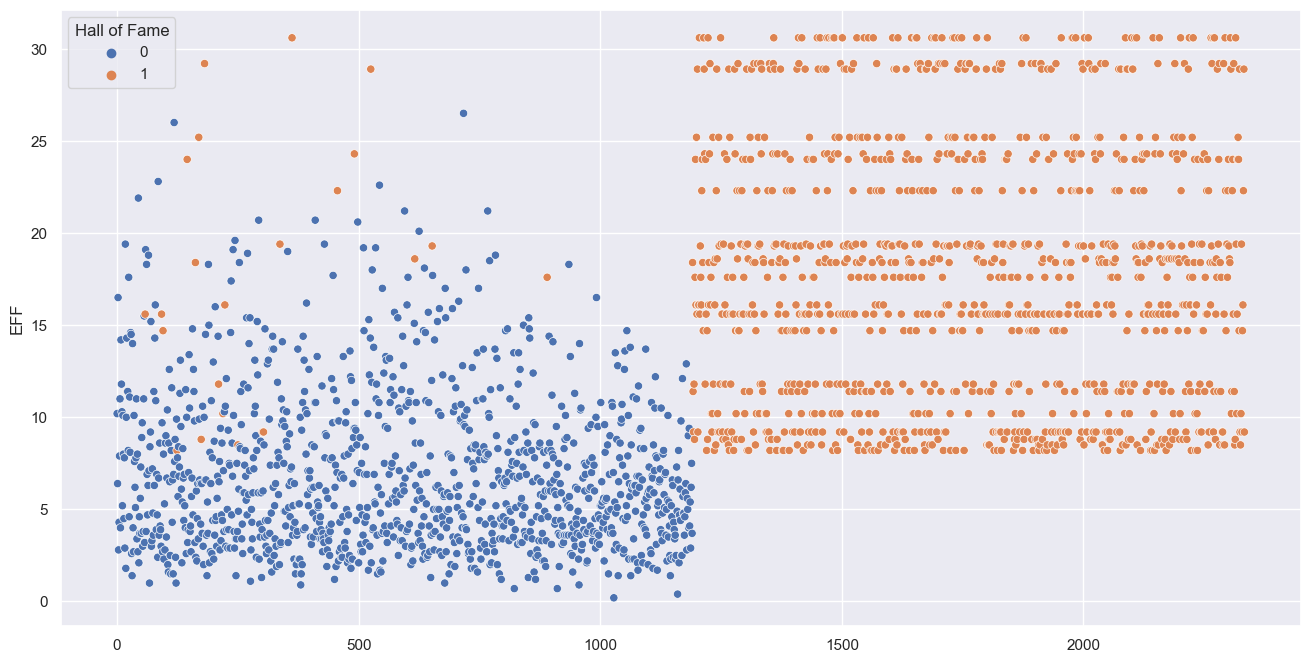

In [37]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=data_OS, x=data_OS.index, y='EFF', hue='Hall of Fame')
data_OS.corr()

Correlation between **EFF** and **Hall of Fame** = **0.676430**

index  Year Drafted        GP       MIN       PTS       FGM  \
index         1.000000      0.998752 -0.444927 -0.270729 -0.326285 -0.362717   
Year Drafted  0.998752      1.000000 -0.451827 -0.283093 -0.340277 -0.376190   
GP           -0.444927     -0.451827  1.000000  0.667133  0.611602  0.626778   
MIN          -0.270729     -0.283093  0.667133  1.000000  0.938230  0.934337   
PTS          -0.326285     -0.340277  0.611602  0.938230  1.000000  0.992414   
FGM          -0.362717     -0.376190  0.626778  0.934337  0.992414  1.000000   
FGA          -0.323486     -0.336586  0.605914  0.943563  0.982727  0.985335   
FG%          -0.381592     -0.388925  0.511624  0.457673  0.508689  0.536472   
3P Made       0.382677      0.377992 -0.000448  0.168521  0.106901  0.066369   
3PA           0.380849      0.376365 -0.010843  0.173878  0.113393  0.072403   
3P%           0.194924      0.193619  0.007600 -0.011031 -0.040172 -0.052411   
FTM          -0.280667     -0.294298  0.534976  0.862273  0.943521  0.902667   
FTA          -0.290122     -0.305034  0.548740  0.881399  0.948758  0.917608   
FT%           0.023718      0.024802  0.125085  0.149386  0.169559  0.125320   
OREB         -0.282568     -0.293612  0.523130  0.744024  0.749122  0.764187   
DREB         -0.160200     -0.174601  0.493882  0.782675  0.791368  0.790197   
REB          -0.206491     -0.220039  0.514746  0.785797  0.793253  0.797636   
AST          -0.259040     -0.264610  0.419991  0.565610  0.500714  0.481117   
STL          -0.385813     -0.388684  0.522469  0.682302  0.669507  0.663644   
BLK          -0.138350     -0.152181  0.388573  0.631732  0.669663  0.656056   
TOV          -0.356590     -0.370875  0.616975  0.913241  0.914564  0.910430   
EFF          -0.314355     -0.328419  0.625826  0.922360  0.962271  0.953295   
Retired            NaN           NaN       NaN       NaN       NaN       NaN   
Hall of Fame -0.504163     -0.517435  0.601718  0.648295  0.706421  0.710028   

                   FGA       FG%   3P Made       3PA  ...      OREB      DREB  \
index        -0.323486 -0.381592  0.382677  0.380849  ... -0.282568 -0.160200   
Year Drafted -0.336586 -0.388925  0.377992  0.376365  ... -0.293612 -0.174601   
GP            0.605914  0.511624 -0.000448 -0.010843  ...  0.523130  0.493882   
MIN           0.943563  0.457673  0.168521  0.173878  ...  0.744024  0.782675   
PTS           0.982727  0.508689  0.106901  0.113393  ...  0.749122  0.791368   
FGM           0.985335  0.536472  0.066369  0.072403  ...  0.764187  0.790197   
FGA           1.000000  0.420035  0.172283  0.185143  ...  0.693726  0.730988   
FG%           0.420035  1.000000 -0.314362 -0.347831  ...  0.629056  0.564189   
3P Made       0.172283 -0.314362  1.000000  0.989043  ... -0.223444 -0.123699   
3PA           0.185143 -0.347831  0.989043  1.000000  ... -0.239690 -0.139976   
3P%           0.018376 -0.315986  0.534612  0.530393  ... -0.349292 -0.282944   
FTM           0.885946  0.466335  0.017827  0.026650  ...  0.709935  0.773013   
FTA           0.893100  0.503187 -0.010207 -0.005331  ...  0.783701  0.840181   
FT%           0.167926 -0.121018  0.252367  0.262508  ... -0.174999 -0.115958   
OREB          0.693726  0.629056 -0.223444 -0.239690  ...  1.000000  0.907541   
DREB          0.730988  0.564189 -0.123699 -0.139976  ...  0.907541  1.000000   
REB           0.732901  0.600403 -0.161787 -0.178461  ...  0.958814  0.989290   
AST           0.553597  0.012531  0.326411  0.359729  ...  0.028195  0.107234   
STL           0.694960  0.248265  0.159684  0.196499  ...  0.294840  0.308647   
BLK           0.587062  0.507757 -0.199115 -0.219802  ...  0.844659  0.886517   
TOV           0.916572  0.424097  0.098531  0.109163  ...  0.694444  0.756920   
EFF           0.913775  0.596976 -0.017060 -0.019106  ...  0.849062  0.895917   
Retired            NaN       NaN       NaN       NaN  ...       NaN       NaN   
Hall of Fame  0.668215  0.541290 -0.102707 -0.105625  ...  0.589028  0.5

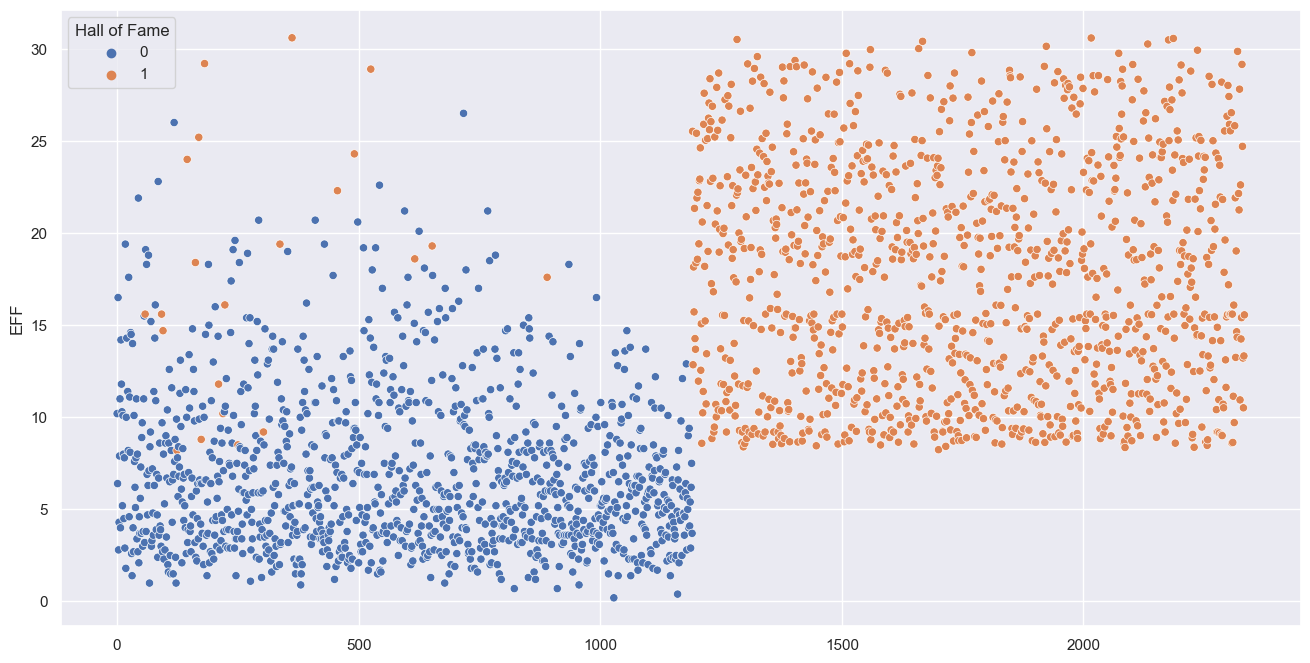

In [38]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=data_SM, x=data_SM.index, y='EFF', hue='Hall of Fame')
data_SM.corr()

Correlation between **EFF** and **Hall of Fame** = **0.719788**

Considering the disadvantages of Undersampling and Oversampling, **SMOTE** will be the best way to balance our dataset, furthermore, **SMOTE** has the highest correlation between **EFF** and **Hall of Fame** among the 3 methods.

## Model Building

We will look into 3 classification machine learning models to see which is the best in helping us predict which rookie end up in the NBA hall of fame.

The 3 models we will be using are: **Logistic Regression**, **Random Forest Classifier** and **K-Nearest Neighbour**

In [39]:
#Combine the SM data and split again
data_SM = pd.concat([X_SM, y_SM],axis=1)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_SM,y_SM,test_size=0.2,random_state=12345)

In [41]:
## Assuming the positive are N and negative are Y 
## Function to get TPR(True Positive Rate) and FPR(False Positive Rate)
def get_TPR(actual, prediction):
    TP = confusion_matrix(actual, prediction)[1][1]
    FN = confusion_matrix(actual, prediction)[1][0]
    TPR = (TP/(TP+FN))
    
    return TPR
    
def get_FPR(actual, prediction):
    FP = confusion_matrix(actual, prediction)[0][1]
    TN = confusion_matrix(actual, prediction)[0][0]
    FPR = (FP/(FP+TN))
    
    return FPR

## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(max_iter=4000)
logR.fit(X_train,y_train.values.ravel())

logR_train_pred=logR.predict(X_train)
logR_test_pred=logR.predict(X_test)

Logistic Regression Confusion Matrix (Train)
Classification Accuracy:  0.9464381360471344
TPR:  0.9842105263157894
FPR:  0.09269356597600872


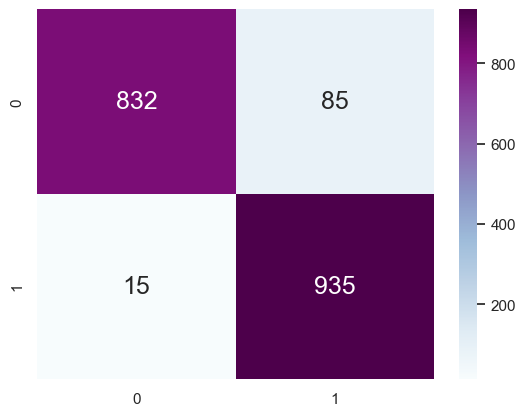

In [56]:
from sklearn.metrics import confusion_matrix
print("Logistic Regression Confusion Matrix (Train)")
sb.heatmap(confusion_matrix(y_train, logR_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", logR.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, logR_train_pred))
print('FPR: ', get_FPR(y_train, logR_train_pred))

Logistic Regression Confusion Matrix (Test)
Classification Accuracy:  0.9486081370449678
TPR:  0.9861751152073732
FPR:  0.084


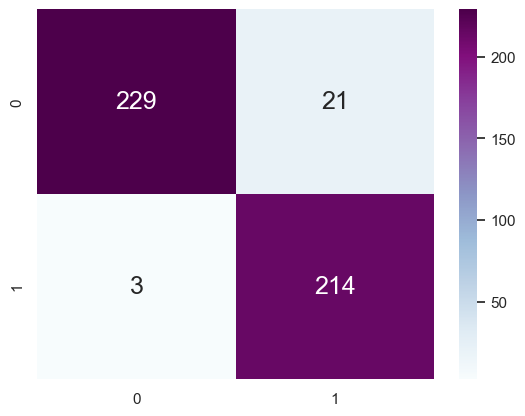

In [57]:
print("Logistic Regression Confusion Matrix (Test)")
sb.heatmap(confusion_matrix(y_test, logR_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", logR.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, logR_test_pred))
print('FPR: ', get_FPR(y_test, logR_test_pred))

In [59]:
# F1 Score
from sklearn.metrics import f1_score
print('K-Nearest Neighbors TRAIN F1 Score: {}'.format(f1_score(y_train,logR_train_pred)))
print('K-Nearest Neighbors TEST F1 Score: {}'.format(f1_score(y_test,logR_test_pred)))

K-Nearest Neighbors TRAIN F1 Score: 0.949238578680203
K-Nearest Neighbors TEST F1 Score: 0.9469026548672567


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train,y_train.values.ravel())

rfc_train_pred = rfc.predict(X_train)
rfc_test_pred = rfc.predict(X_test)

In [ ]:
print("Random Forest Classifier Confusion Matrix (Train)")
sb.heatmap(confusion_matrix(y_train, rfc_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", rfc.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, rfc_train_pred))
print('FPR: ', get_FPR(y_train, rfc_train_pred))

In [ ]:
print("Random Forest Classifier Confusion Matrix (Test)")
sb.heatmap(confusion_matrix(y_test, rfc_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", rfc.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, rfc_test_pred))
print('FPR: ', get_FPR(y_test, rfc_test_pred))

In [ ]:
# F1 Score
print('Random Forest Classifier TRAIN F1 Score: {}'.format(f1_score(y_train,rfc_train_pred)))
print('Random Forest Classifier TEST F1 Score: {}'.format(f1_score(y_test,rfc_test_pred)))

## K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n=2
knn=KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train.values.ravel())

knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

In [ ]:
print("K-Nearest Neighbors Confusion Matrix (Train)")
sb.heatmap(confusion_matrix(y_train, knn_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", knn.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, knn_train_pred))
print('FPR: ', get_FPR(y_train, knn_train_pred))

In [ ]:
print("K-Nearest Neighbors Confusion Matrix (Test)")
sb.heatmap(confusion_matrix(y_test, knn_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", knn.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, knn_test_pred))
print('FPR: ', get_FPR(y_test, knn_test_pred))

In [ ]:
# F1 Score
print('K-Nearest Neighbors TRAIN F1 Score: {}'.format(f1_score(y_train,knn_train_pred)))
print('K-Nearest Neighbors TEST F1 Score: {}'.format(f1_score(y_test,knn_test_pred)))